<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-работы" data-toc-modified-id="Описание-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание работы</a></span></li><li><span><a href="#Чтение-и-подготовка-данных" data-toc-modified-id="Чтение-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чтение и подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# Исследование оттока клиентов в фитнес-центре

## Описание работы

Задача проекта: провести анализ и подготовить план действий по удержанию клиентов для борьбы с оттоком.

А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.
    
В качестве исходных данных предоставлены обработанная информация из клиентских анкет в csv-файлах. 

Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;
- Текущие поля в датасете:
 - Данные клиента за предыдущий до проверки факта оттока месяц:
   - 'gender' — пол;
   - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
   - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
   - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
   - 'Phone' — наличие контактного телефона;
   - 'Age' — возраст;
   - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
 - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
 - 'Group_visits' — факт посещения групповых занятий;
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Чтение и подготовка данных

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns            
import numpy as np
from IPython.display import display, Markdown

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter('ignore')

In [2]:
# Чтение данных
df = pd.read_csv('/content/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# Общая информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Проверка дубликатов
df.duplicated().sum()

0

In [5]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Данные содержат 4000 наблюдений, 13 признаков и 1 столбец с целевыми значениями. В таблице нет пропусков, дубликатов, все столбцы с соотвествующим типом данных.**


## Исследовательский анализ данных

In [6]:
# Общая информация о распределении значений в таблице
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [7]:
# Количество оставшихся и выбывших в выборке
df.groupby('churn')['gender'].count()

churn
0    2939
1    1061
Name: gender, dtype: int64

**Признаки `gender`, `near_location`,	`partner`, `promo_friends`, `phone`, `group_visits`, а также целевые значения `churn` являются бинарными (имеют только 2 варианта значений).**

**Можно отметить, что в выборке примерно поровну представлены клиенты разного пола. Однако "остающихся" в выборке почти в 3 раза больше, чем "выбвших"**

In [8]:
# Средние значения признаков по группам оттока (целевого значения)
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<b> Исходя из средних значений признаков можем выделить следующие особенности "ушедших" клиентов:
- реже живут вблизи от фитнес-центра;
- реже являются партнерами фитнес-центра;
- реже приходят по приглашению от друзей;
- абонементы на менее длительный срок (1,7 месяца против 5,7 месяцев);
- меньше срок до окончания действия абонемента (1,7 месяца против 5,3 месяцев);
- реже посещают групповые занятия;
- меньше тратят на другие услуги фитнес-центра (115 у.е. против 158 у.е.);
- меньше время с первого посещения (1 месяц против 4,7 месяцев);
- немного меньше средняя частота посещений в неделю (1,47 дней против 2,02 дня);
- в последний месяц перед оттоком частота посещения уменьшается (до 1,04 дня). <b>

In [9]:
#таблицы ушедших и оставшихся клиентов
df_churn = df.query('churn == 1')
df_not_churn = df.query('churn == 0')

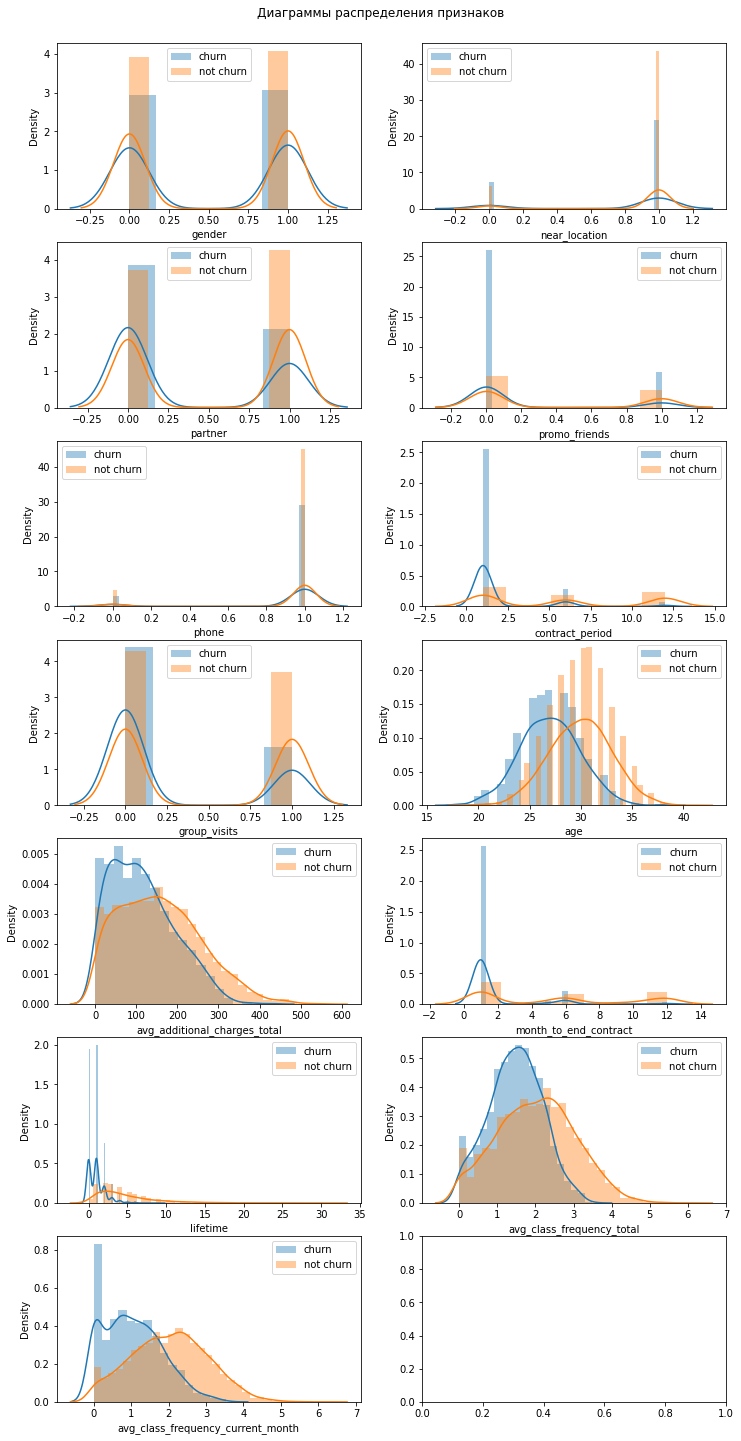

In [10]:
# Cоздаём переменную для 'сетки' и названия признаков
grid =  [(i, j) for i in range(7) for j in range(2)]
data_plot_columns = df.drop(columns=['churn']).columns

# Строим гистограммы с распределениями значений признаков ушедших и оставшихся клиентов
fig, ax = plt.subplots(7, 2, figsize=(12, 25))
for position, column in zip(grid, data_plot_columns):
    sns.distplot(df_churn[column], label='churn', ax=ax[position])
    sns.distplot(df_not_churn[column], label = 'not churn', ax=ax[position])
    ax[position].legend()
plt.suptitle('Диаграммы распределения признаков', y=0.9)    
plt.show()

<b>На диаграммах распределения видим подтверждение вышеприведеных выводов. Также можем наблюдать практически идеальное нормальное распределение значений в признаке возраста клиентов (`age`). Остальные распределения уже не так близки к нормальному, однако явных выбросов не обнаружено. <b>

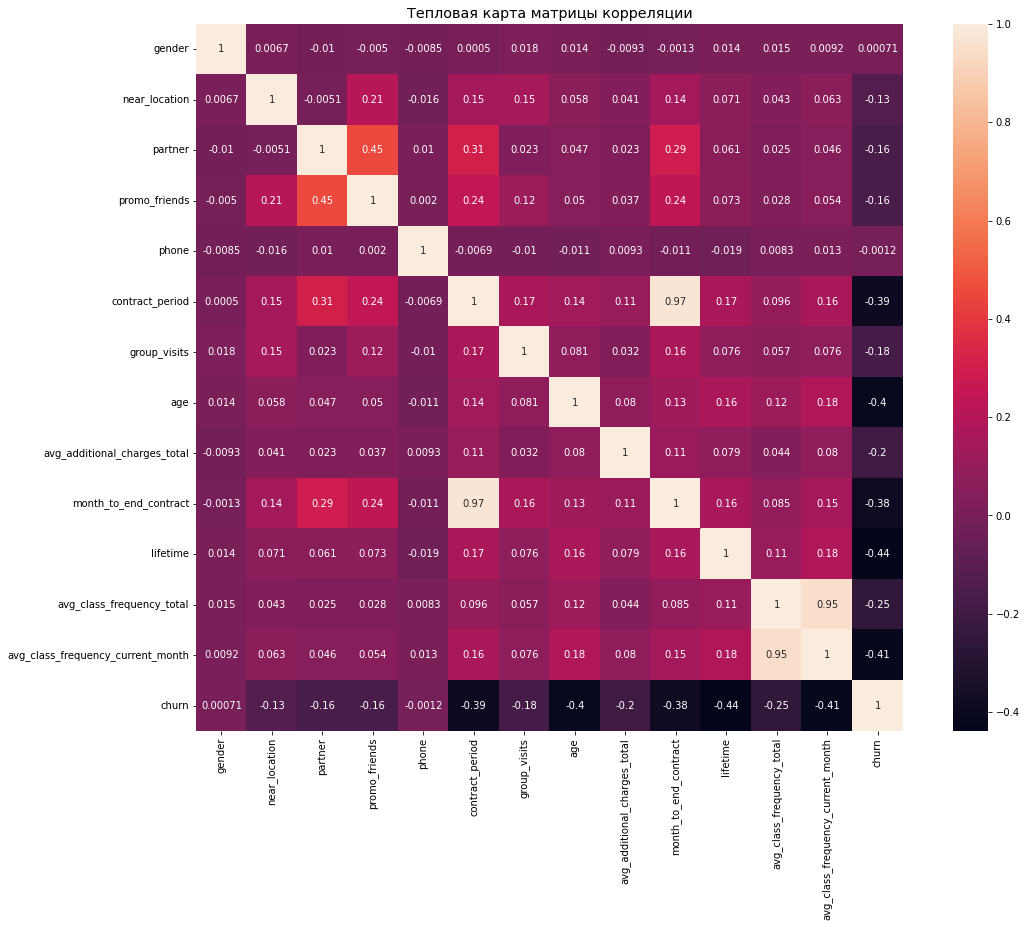

In [11]:
#построим матрицу корреляций
cm = df.corr()
fig, ax = plt.subplots(figsize=(18,13))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
plt.title('Тепловая карта матрицы корреляции', size='x-large')
plt.show()

<b>На матрице корреляции видим сильную прямую зависимость признаков длительности текущего абонемента (`contract_period`) и срока до его окончания (`month_to_end_contract`), а также между средней частотой посещений за всё время (`avg_class_frequency_total`) и в последний месяц (`avg_class_frequency_current_month`). Данные признаки можно объединить между собой, так как они характеризуют одно и то же свойство.

    
По влиянию на целевое значение нет высоких показателей. Можно отметить среднюю отрицательную корреляцию признаков `lifetime`, `avg_class_frequency_current_month` и `age`. 
    
<br>В целом, качество данных позволяет построить модель на их основе. <br>   <b>

## Модель прогнозирования оттока клиентов

<b> Так как целевое значение является бинарной величиной, мы будет строить модель на основе бинарной классификации. А именно будем применять алгоритмы логистической регрессии, случайного леса и градиентного бустинга.

Оценивать модели будем по метрикам: accuracy, precision, recall, F1 score, ROC-AUC. <br>В случае прогнозирования оттока нам нужно обратить большее внимание на правильность оценки остающихся, так как не заметить потенциальный отток и потерять клиента будет дороже, чем проработать "остающегося" клиента. Соотвественно на метрику recall стоит сделать акцент.<br>И наоборот, так как выборка слабо сбалансирована по классам целевых значений, метрика accuracy интересует нас в меньшей степени.<br><b>
    
Делить выборки будем методом случайного разбиения в соотношении обучающей выборки к валидационной - 80 к 20, так как наблюдения не зависят от временного ряда.    

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [13]:
# список моделей
models = [
    LogisticRegression(solver='liblinear', random_state = 0, C=10.0),
    RandomForestClassifier(n_estimators = 200, random_state = 0),
    GradientBoostingClassifier(n_estimators = 200, random_state = 0,  max_depth = 9),
]

In [14]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    '''функция, которая принимает на вход модель и данные и выводит метрики'''  
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} roc_auc_score:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, y_proba)
        )
    )

In [15]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')
Accuracy:0.94 Precision:0.90 Recall:0.86 F1:0.88 roc_auc_score:0.98 
RandomForestClassifier(n_estimators=200, random_state=0)
Accuracy:0.93 Precision:0.88 Recall:0.83 F1:0.86 roc_auc_score:0.97 
GradientBoostingClassifier(max_depth=9, n_estimators=200, random_state=0)
Accuracy:0.94 Precision:0.91 Recall:0.87 F1:0.89 roc_auc_score:0.98 


**Модель на основе градиентного бустинга по метрикам показала себя лучше остальных. <br>Важная для нас метрика recall  - 86%, при значении сводной метрики F1 score (учитывающей баланс recall и precision) - 88%, ROC-AUC score - 98%. Такие же метрики у логистической регрессии. Однако по метрике Precision градиентный бустинг чуть лучше (91% против 90%)**

In [16]:
# обучим финальную модель
final_model = GradientBoostingClassifier(n_estimators = 350, random_state = 0,  max_depth = 8)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)

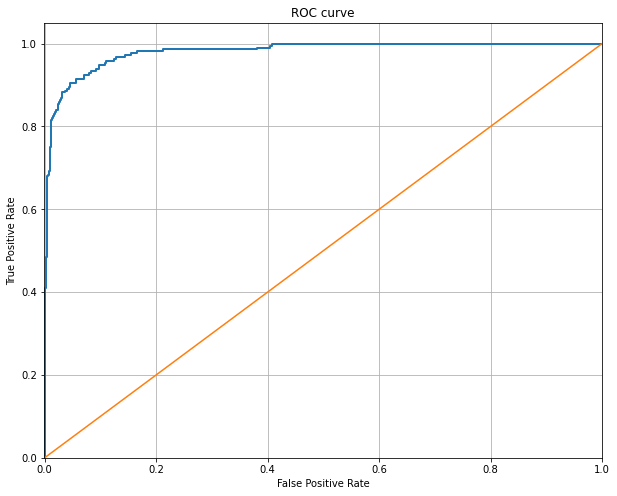

**roc_auc_score:0.98** 

In [17]:
#Отрисуем кривую ошибок (ROC) для финальной модели

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test_st)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([-0.001, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.show()

Markdown('**roc_auc_score:{:.2f}** '.format(roc_auc_score(y_test, final_model.predict_proba(X_test_st)[:,1])))

In [18]:
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
feature_weights = final_model.feature_importances_ 
display(pd.DataFrame(feature_weights).sort_values(0, ascending=False).join(
        pd.DataFrame(X.columns), lsuffix='_weight', rsuffix='_feature'))

,0_weight,0_feature
10,0.357924,lifetime
12,0.182507,avg_class_frequency_current_month
11,0.180977,avg_class_frequency_total
9,0.095477,month_to_end_contract
7,0.076676,age
8,0.058199,avg_additional_charges_total
5,0.023441,contract_period
6,0.008441,group_visits
0,0.004761,gender
4,0.004374,phone


**Наибольшее влияние на целевое значение оказывает время с момента первого обращения в фитнес-центр (`lifetime`), также значительую роль играет частота посещения фитнес-центра (`avg_class_frequency_current_month` и `avg_class_frequency_total`)**

## Кластеризация клиентов

In [19]:
# Стандартизация данных 
sc = StandardScaler()
X_sc = sc.fit_transform(X)

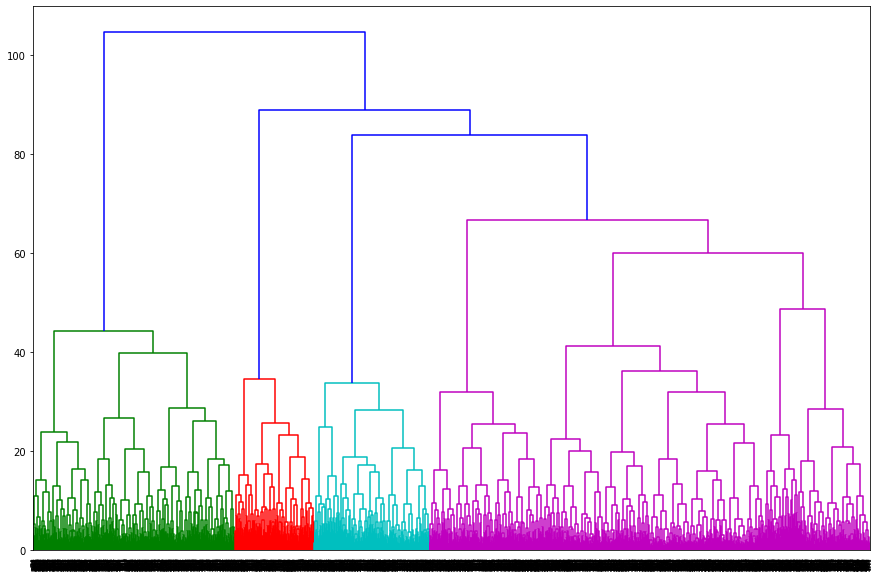

In [20]:
# Создаем таблицу «связок» между объектами и строим дендрограмму
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

**Исходя из дендрограммы, предлагается выделить 5 кластеров, так как последний кластер очень большой.**

In [21]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)

In [22]:
# сохраняем метки кластера в поле нашего датасета
X['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
X_mean = X.groupby('cluster_km').mean().reset_index()
X_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


<b>Среди определенных с помощью алгоритма K-means кластеров можно выделить отдельные кластеры для клиентов:
- живущих вне района фитнес-центра (кластер 2);
- у которых отсутствует номер телефона (кластер 1);
- с длительным действующим абонементом и соответсвенно сроком до его окончания(средние 10,9 мес. и 10 мес. соответсвенно) (кластер 0). <b>

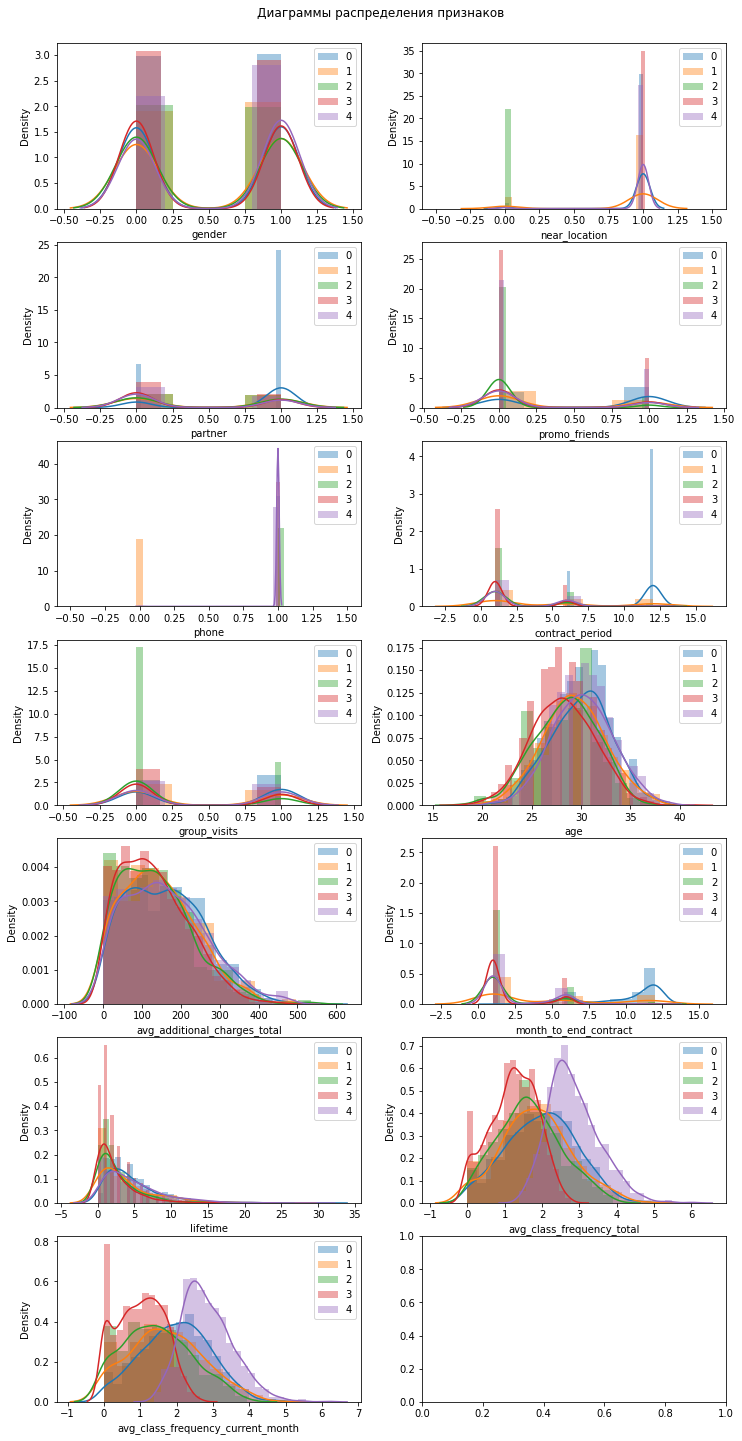

In [23]:
# Строим гистограммы с распределениями значений признаков ушедших и оставшихся клиентов
fig, ax = plt.subplots(7, 2, figsize=(12, 25))
for position, column in zip(grid, data_plot_columns):
    sns.distplot(X.query('cluster_km == 0')[column], label='0', ax=ax[position])
    sns.distplot(X.query('cluster_km == 1')[column], label = '1', ax=ax[position])
    sns.distplot(X.query('cluster_km == 2')[column], label = '2', ax=ax[position])
    sns.distplot(X.query('cluster_km == 3')[column], label = '3', ax=ax[position])
    sns.distplot(X.query('cluster_km == 4')[column], label = '4', ax=ax[position])
    ax[position].legend()
plt.suptitle('Диаграммы распределения признаков', y=0.9)    
plt.show()

In [24]:
cluster_count = X.groupby('cluster_km')['gender'].count().reset_index().sort_values('gender', ascending=False).rename(columns={'gender':'count'})
cluster_count

,cluster_km,count
3,3,1262
0,0,1010
4,4,838
2,2,505
1,1,385


**После изучения распределения признаков по кластерам также можем заметить, что в кластере 0 собралось больше всего (78%) клиентов-партнеров и этот же кластер лидирует по количеству клиентов, пришедших по акции "приведи друга" (57%).**

**Значения возраста и пола распределились по кластерам относительно равномерно**

**Объем кластеров (количество клиентов в них) различается. Самый большой кластер 3 - 1262 клиентов, самый маленький 1 - 385 клиентов.**

In [25]:
# Добавляем столбец с кластерами в первоначальную таблицу
df['cluster_km'] = labels
# Группируем по кластерам и считаем среднее значение оттока
churn_cluster = df.groupby('cluster_km')['churn'].mean().round(2)
churn_cluster.sort_values(ascending=False)

cluster_km
3    0.51
2    0.44
1    0.27
4    0.07
0    0.03
Name: churn, dtype: float64

In [26]:
#Создадим таблицу с количеством клиентов с определенным сроком абонемента
df_contract_period_group = X.groupby(['cluster_km','contract_period'])['gender'].count().reset_index().rename(columns={'gender':'count'})
#Вычислим долю клиентов с определенным сроком абонемента в своем кластере 
df_contract_period_group = df_contract_period_group.merge(cluster_count, on='cluster_km').rename(columns={'count_x':'count', 'count_y':'sum'})
df_contract_period_group['part'] = (df_contract_period_group['count'] / df_contract_period_group['sum']).round(2)
df_contract_period_group

,cluster_km,contract_period,count,sum,part
0,0,6,187,1010,0.19
1,0,12,823,1010,0.81
2,1,1,205,385,0.53
3,1,6,87,385,0.23
4,1,12,93,385,0.24
5,2,1,390,505,0.77
6,2,6,97,505,0.19
7,2,12,18,505,0.04
8,3,1,1031,1262,0.82
9,3,6,224,1262,0.18


In [27]:
#Средние значения признаков по кластерам
X_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


<b> Более всего к оттоку склонны кластеры 3 и 2: 51% и 44% оттока соответсвенно. <br>Примечательно, что в этих группах полярные значения нахождения в районе фитнес-центра: клиенты кластера 3 находятся в районе фитнес-центра, клиенты кластера 2 - вне района, поэтому можно говорить, что данный признак не оказывает существенного влияния на отток.<br>
<br>Данные кластеры можно охарактеризовать следующим образом:
- низкие значения длительности действующего абонемента и срока до его окончания (в основном берут абонемент на месяц);
- наименьшая доля посещений групповых занятий (редко посещают групповые занятия);
- низкие значения расходов на дополнительные услуги фитнес-центра (редко пользуются дополнительными услугами центра, в среднем до 140 у.е.);
- низкие значения lifetime (относительно недавно посещают центр, до 3 месяцев);
- низкие значения частоты посещения фитнес-центра и уменьшения этого показателя в последний месяц (посещают фитнес-центр в среднем 1-2 раза в неделю и ходят немного реже в последний месяц перед прогнозом).    <br> <b>

<b>Надежнее же всего клиенты из кластеров 0 и 4: 3% и 7% оттока соответственно. 

В данных кластерах можно отметить:
- наибольшая доля посещения групповых занятий (около 50% группы посещают групповые занятия);
- высокие значения расходов на дополнительные услуги фитнес-центра (в среднем около 160 у.е.);
- высокие значения lifetime (посещают центр в среднем около 5 месяцев);
- высокие значения частоты посещения фитнес-центра и неизменность показателей в последний месяц (ходят в фитнес-центр в среднем 2-3 раза в неделю и также ходят в последний месяц перед прогнозом).

Кластер 0 характеризуется высоким значением срока абонементов (в основном клиенту берут абонементы на год). Кластер 4 не отличается такими длительными абонементами, но доля покупающих абонемент на 6 месяцев в этом кластере больше чем в подверженных оттоку кластерах.</b>

## Выводы и рекомендации

Основными признаками, влияющими на отток можно назвать:

<b>1. Время с первого посещения (lifetime) до 3 месяцев
<br><br> 2. Низкая частота посещения и её снижение в последний месяц
<br><br> 3. Небольшие расходы на дополнительные услуги фитнес-центра
<br><br></b>

В связи с этим можно рекомендовать:

<b>1. Большее внимание уделить клиентам, посещающим фитнес-центр менее 3-х месяцев. </b>
<br><br>Например, продвигать более длительные абонементы, чтобы у клиентов была финансовая мотивация продолжать заниматься. В имеющейся у нас выборке данных нет ни одного абонемента на 3 месяца. Хотя возможно клиентам легче было бы решиться на такой абонемент, чем на 6 месяцев и при этом привычка посещения за 3 месяца уже была бы сформирована.
<br><br>
<b>2. Стимулировать более частые посещения фитнес-центра и принимать дополнительные меры при снижении частоты.</b>
<br><br>Например, отправлять напоминания, мотивационные сообщения в месенджер или делать дополнительные стимулы для тех, кто приходит в будние дни, а не только по выходным. Возможно, предлагать скидку на будущий абонемент при снижении посещаемости.
<br><br>
<b>3. Стимулировать клиентов к более значительным тратам на дополнительные услуги фитнес-центра.</b>
<br><br>Например, предлагать тонизирующие коктейли и т.п. после тренировки (стимулируя аппетитными запахами) или активнее рекламировать пользу массажа и косметических процедур для достижения целей клиентов (похудение, оздоровление, избежание травм).<br>